In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
questions = pd.read_csv('questions_only.csv')
mcr = pd.read_csv('multiple_choice_responses_answers_only.csv')
otr = pd.read_csv('other_text_responses_answers_only.csv')

In [3]:
countries = mcr.Q3.unique()
print(countries)
print(len(countries))

['France' 'India' 'Germany' 'Australia' 'United States of America'
 'Netherlands' 'Ireland' 'Russia' 'Greece' 'Ukraine' 'Pakistan' 'Japan'
 'Other' 'Brazil' 'South Korea' 'Belarus' 'Nigeria'
 'United Kingdom of Great Britain and Northern Ireland' 'Sweden' 'Mexico'
 'Canada' 'Portugal' 'Poland' 'Indonesia' 'Italy' 'Czech Republic' 'Spain'
 'Morocco' 'Chile' 'Hong Kong (S.A.R.)' 'South Africa' 'Hungary'
 'Argentina' 'Turkey' 'Singapore' 'Israel' 'Taiwan' 'Egypt' 'Bangladesh'
 'Colombia' 'Norway' 'Thailand' 'China' 'Switzerland' 'Viet Nam' 'Denmark'
 'Tunisia' 'Republic of Korea' 'New Zealand'
 'Iran, Islamic Republic of...' 'Peru' 'Kenya' 'Romania' 'Malaysia'
 'Belgium' 'Algeria' 'Austria' 'Philippines' 'Saudi Arabia']
59


In [4]:
# Comparison of the reponses per million population rate among 6 similar sized countries with NZ
populations = pd.read_csv('world_population_2019.csv')
similar_sized_countries_population = populations[(populations.pop2019 < 6000000) & (populations.pop2019 > 3000000)]
similar_sized_countries_name = similar_sized_countries_population.name
similar_sized_countries = pd.merge(mcr, similar_sized_countries_name, how='inner', left_on='Q3', right_on='name')
similar_sized_countries.drop(columns='name', inplace=True)
print(similar_sized_countries.Q3.unique())
five_countries_pop = populations[(populations.name == 'Ireland') | (populations.name == 'Singapore') | (populations.name == 'Norway') \
     | (populations.name == 'Denmark') | (populations.name == 'New Zealand')]

['Ireland' 'Singapore' 'Norway' 'Denmark' 'New Zealand']


In [5]:
NZ = mcr[mcr.Q3 == 'New Zealand']
SI = mcr[mcr.Q3 == 'Singapore']
DM = mcr[mcr.Q3 == 'Denmark']
NW = mcr[mcr.Q3 == 'Norway']
IL = mcr[mcr.Q3 == 'Ireland']
five_countries_pop['num_responses'] = [len(SI), len(DM), len(NW), len(IL), len(NZ)]
five_countries_pop['responses_per_million'] = five_countries_pop['num_responses'] / (five_countries_pop['pop2019'] / 1000000.0)
print(five_countries_pop[['name', 'pop2019', 'num_responses', 'responses_per_million']])

            name  pop2019  num_responses  responses_per_million
113    Singapore  5804337            156              26.876455
114      Denmark  5771876             55               9.528964
118       Norway  5378857             51               9.481568
123      Ireland  4882495             89              18.228385
124  New Zealand  4783063             51              10.662624


E:\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


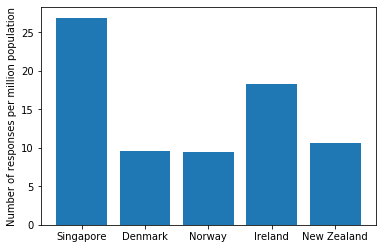

In [6]:
plt.bar(data=five_countries_pop, x='name', height='responses_per_million')
plt.ylabel('Number of responses per million population')
plt.show()

                     Q6  Q1  size
5         Not Available   7     5
4    > 10,000 employees   3     4
1  1000-9,999 employees  10     3
2     250-999 employees   8     2
3      50-249 employees  11     1
0        0-49 employees  12     0


E:\Anaconda3\envs\data_analysis\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


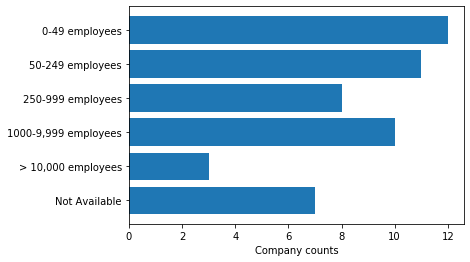

In [7]:
# Company sizes of the NZ respondents
NZ.fillna(value={'Q6':'Not Available'}, inplace=True)
NZ_company_size = NZ.groupby('Q6').Q1.count().reset_index()
NZ_company_size['size'] = [0, 3, 2, 1, 4, 5]
NZ_company_size.sort_values(by=['size'], ascending=False, inplace=True)
print(NZ_company_size)

size = NZ_company_size.Q6.values
y_pos = range(len(size))
ax = plt.subplot()
plt.barh(y_pos, NZ_company_size.Q1)
plt.yticks(y_pos)
ax.set_yticklabels(size)
ax.set_xlabel('Company counts')
plt.show()

E:\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


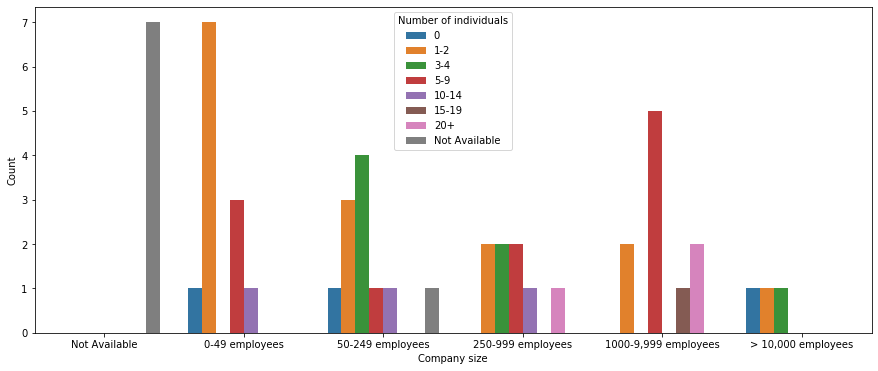

In [8]:
#Q7: Approximately how many individuals are responsible for data science workloads at your place of business?
NZ['Q7_reformatted'] = NZ.Q7.apply(lambda x: '1-2' if x == '2-Jan' else '3-4' if x == '4-Mar' else '5-9' if x == '9-May' \
                                  else '10-14' if x == '14-Oct' else 'Not Available' if pd.isnull(x) else x)
NZ_compsize_numdataind = NZ.groupby(['Q6', 'Q7_reformatted']).Q1.count().reset_index()
NZ_compsize_numdataind.columns = ['Company size', 'Number of individuals', 'Count']

fig = plt.figure(figsize=(15, 6))
ax = plt.subplot()
comp_size_ordered = ['Not Available', '0-49 employees', '50-249 employees', '250-999 employees', '1000-9,999 employees', '> 10,000 employees']
num_ind_ordered = ['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+', 'Not Available']
sns.barplot(data=NZ_compsize_numdataind, x='Company size', y='Count', hue='Number of individuals', order=comp_size_ordered, hue_order=num_ind_ordered)
plt.show()

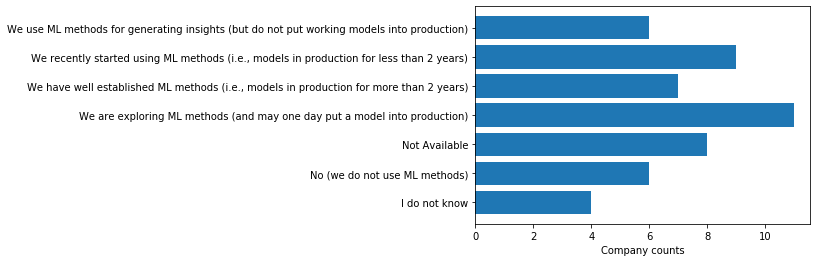

In [9]:
NZ.fillna(value={'Q8':'Not Available'}, inplace=True)
NZ_use_ML = NZ.groupby('Q8').Q1.count().reset_index()

plt.barh(NZ_use_ML.Q8, NZ_use_ML.Q1)
plt.xlabel('Company counts')
plt.show()

In [36]:
def multiple_choice(df, q, n):
    dataframe = pd.DataFrame(columns=['col1', 'col2'])
    for i in range(n):
        data = pd.DataFrame([[df['Q{}_Part_{}'.format(q, i+1)].dropna().iloc[0], df['Q{}_Part_{}'.format(q, i+1)].count()]], \
                           columns=['col1', 'col2'])
        dataframe = dataframe.append(data, ignore_index=True)
    return dataframe

NZ_Q9_answers_count = multiple_choice(NZ, 9, 8)
NZ_Q9_answers_count.columns=['Activity', 'Count']
NZ_Q9_answers_count.sort_values(by=['Count'], ascending=False, inplace=True)
NZ_Q9_answers_count.index = range(8)
NZ_Q9_answers_count.style

,Activity,Count
0,Analyze and understand data to influence product or business decisions,22
1,Build prototypes to explore applying machine learning to new areas,19
2,Build and/or run a machine learning service that operationally improves my product or workflows,13
3,Experimentation and iteration to improve existing ML models,13
4,"Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",12
5,Do research that advances the state of the art of machine learning,6
6,None of these activities are an important part of my role at work,2
7,Other,1


                         Q5  Q1
0          Business Analyst   1
1     DBA/Database Engineer   1
2              Data Analyst   8
3             Data Engineer   1
4            Data Scientist  13
5              Not employed   1
6                     Other   6
7   Product/Project Manager   2
8        Research Scientist   5
9         Software Engineer   7
10                  Student   6


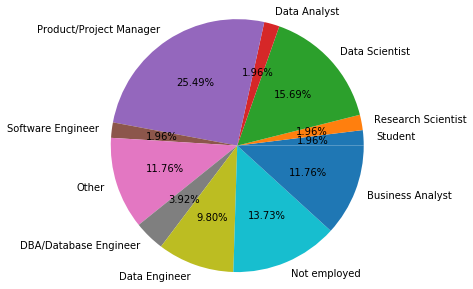

In [11]:
# Job titles of the NZ respondents
NZ_job_titles = NZ.groupby('Q5').Q1.count().reset_index()
print(NZ_job_titles)

fig = plt.figure(figsize=(5, 5))
plt.pie(NZ_job_titles.Q1, labels=NZ.Q5.unique(), autopct='%0.2f%%')
plt.axis('equal')
plt.show()

In [12]:
# What are the job titles in other? None of them is specified.
NZ_Q5_other_index = mcr[(mcr.Q3 == 'New Zealand') & (mcr.Q5 == 'Other')].index.values
NZ_Q5_other_text = otr.loc[NZ_Q5_other_index].Q5_OTHER_TEXT
print(NZ_Q5_other_text)

2962     NaN
7604     NaN
12058    NaN
13304    NaN
17398    NaN
18321    NaN
Name: Q5_OTHER_TEXT, dtype: object


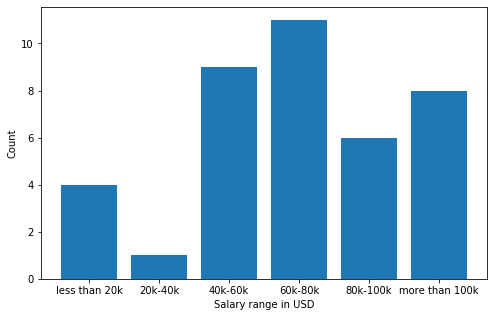

In [13]:
NZ_salary = NZ.groupby('Q10').Q1.count().reset_index()
NZ_salary.iloc[0,0] = '0-999'

NZ_grouped_salary = pd.DataFrame([['less than 20k', 4], ['20k-40k', 1], ['40k-60k', 9], ['60k-80k', 11], \
                                 ['80k-100k', 6], ['more than 100k', 8]], columns=['Salary range', 'Count'])

fig = plt.figure(figsize=(8, 5))
plt.bar(data=NZ_grouped_salary, x='Salary range', height='Count')
plt.xlabel('Salary range in USD')
plt.ylabel('Count')
plt.show()

In [14]:
AUS = mcr[mcr.Q3 == 'Australia']
print(len(AUS))
print(populations[populations.name == 'Australia'].pop2019)

269
54    25203198
Name: pop2019, dtype: int64


In [23]:
AUSNZ = mcr[(mcr.Q3 == 'Australia') | (mcr.Q3 == 'New Zealand')]
print(len(AUSNZ))

320


                                               Source Count
0                                            Coursera   144
1   University Courses (resulting in a university ...    96
2                                            DataCamp    82
3                  Kaggle Courses (i.e. Kaggle Learn)    81
4                                               Udemy    68
5                                                 edX    49
6                                             Fast.ai    31
7                                                None    30
8                                             Udacity    28
9                                   LinkedIn Learning    23
10                                              Other    21
11                                          DataQuest     7


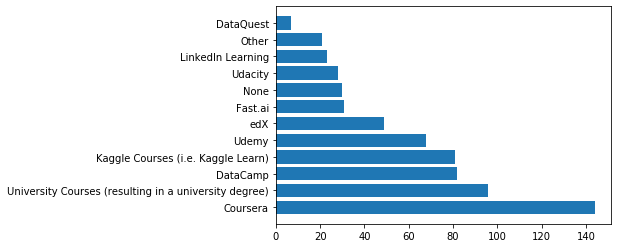

In [38]:
AUSNZ_Q13_answers_count = multiple_choice(AUSNZ, 13, 12)
AUSNZ_Q13_answers_count.columns = ['Source', 'Count']
AUSNZ_Q13_answers_count.sort_values(by=['Count'], ascending=False, inplace=True)
AUSNZ_Q13_answers_count.index = range(12)
print(AUSNZ_Q13_answers_count)

plt.barh(AUSNZ_Q13_answers_count.Source, AUSNZ_Q13_answers_count.Count)
plt.show()

In [41]:
AUSNZ_reclan = AUSNZ.groupby('Q19').Q1.count().reset_index()
AUSNZ_reclan.columns = ['Recommendation', 'Count']
AUSNZ_reclan.sort_values(by=['Count'], ascending=False, inplace=True)
AUSNZ_reclan.index = range(10)
AUSNZ_reclan.style

,Recommendation,Count
0,Python,168
1,R,37
2,SQL,31
3,Other,7
4,None,5
5,C,2
6,MATLAB,2
7,C++,1
8,Java,1
9,Javascript,1


In [45]:
AUSNZ_Q18_answers_count = multiple_choice(AUSNZ, 18, 12)
AUSNZ_Q18_answers_count.columns = ['Language', 'Count']
AUSNZ_Q18_answers_count.sort_values(by=['Count'], ascending=False, inplace=True)
AUSNZ_Q18_answers_count.index = range(12)
AUSNZ_Q18_answers_count.style

,Language,Count
0,Python,208
1,SQL,147
2,R,118
3,Bash,51
4,Javascript,40
5,Other,34
6,C++,27
7,Java,24
8,C,23
9,MATLAB,20


In [46]:
AUSNZ_Q18_other_index = mcr[((mcr.Q3 == 'New Zealand') | (mcr.Q3 == 'Australia')) & (mcr.Q18_Part_12 == 'Other')].index.values
AUSNZ_Q18_other_text = otr.loc[AUSNZ_Q18_other_index].Q18_OTHER_TEXT
print(AUSNZ_Q18_other_text.unique())

['Golang' nan 'Scala']
